In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data Set
file_path = "../data/default_of_credit_card_clients.xls"
data = pd.read_excel(file_path, header=1)

data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [2]:
data.rename(columns={
    'PAY_0': 'PAY_1',
    'default payment next month' : 'default_next_month'
}, inplace=True)

data.columns = [col.lower() for col in data.columns] 

# Saving clean data in .csv file
data.to_csv("../data/cleaned_data.csv", index=False)


In [3]:
# Shape
print("Rows, Columns:", data.shape)

Rows, Columns: (30000, 25)


In [4]:
# Missing values
print("\nMissing values:\n", data.isnull().sum().sum())


Missing values:
 0


In [5]:
# Data types
print("\nData types:\n", data.dtypes)


Data types:
 id                    int64
limit_bal             int64
sex                   int64
education             int64
marriage              int64
age                   int64
pay_1                 int64
pay_2                 int64
pay_3                 int64
pay_4                 int64
pay_5                 int64
pay_6                 int64
bill_amt1             int64
bill_amt2             int64
bill_amt3             int64
bill_amt4             int64
bill_amt5             int64
bill_amt6             int64
pay_amt1              int64
pay_amt2              int64
pay_amt3              int64
pay_amt4              int64
pay_amt5              int64
pay_amt6              int64
default_next_month    int64
dtype: object


In [6]:
# Summary statistics
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0


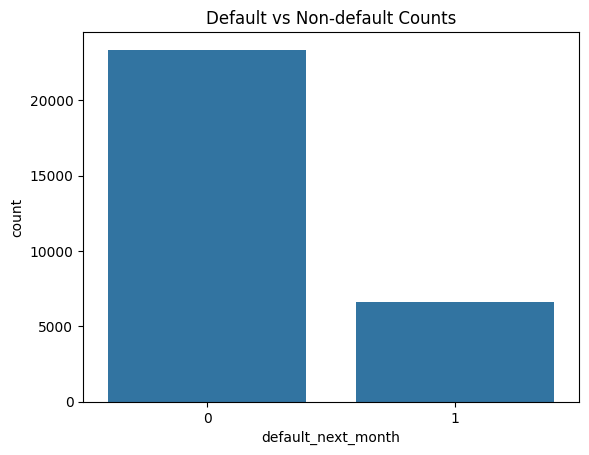

default_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [7]:
sns.countplot(x='default_next_month', data=data)
plt.title('Default vs Non-default Counts')
plt.show()

data['default_next_month'].value_counts(normalize=True)
